In [1]:
from pyspark import SparkContext, SparkConf
cf = SparkConf()
cf.set("spark.submit.deployMode","client")
sc = SparkContext.getOrCreate(cf)
from pyspark.sql import SparkSession
spark = SparkSession \
	    .builder \
	    .appName("Python Spark SQL basic example") \
	    .config("spark.some.config.option", "some-value") \
	    .getOrCreate()
                            

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/24 04:17:48 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
23/11/24 04:17:48 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
23/11/24 04:17:48 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
23/11/24 04:17:48 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


In [2]:
# attributes: summons_number,issue_date,violation_code,violation_county,violation_description,
#violation_location,violation_precinct,violation_time,time_first_observed,meter_number,issuer_code,
#issuer_command,issuer_precinct,issuing_agency,plate_id,plate_type,registration_state,street_name,
#vehicle_body_type,vehicle_color,vehicle_make,vehicle_year
parking_df = spark.read.csv(path='/shared/CS-GY-6513/parking-violations/parking-violations-header.csv',header=True)

In [3]:
# check what the data looks like
parking_df.show()

+--------------+----------+--------------+----------------+---------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+-----------------+-----------------+-------------+------------+------------+
|summons_number|issue_date|violation_code|violation_county|violation_description|violation_location|violation_precinct|violation_time|time_first_observed|meter_number|issuer_code|issuer_command|issuer_precinct|issuing_agency|plate_id|plate_type|registration_state|      street_name|vehicle_body_type|vehicle_color|vehicle_make|vehicle_year|
+--------------+----------+--------------+----------------+---------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+-----------------+-----------------+-------------+----

In [4]:
parking_df.printSchema()

root
 |-- summons_number: string (nullable = true)
 |-- issue_date: string (nullable = true)
 |-- violation_code: string (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_description: string (nullable = true)
 |-- violation_location: string (nullable = true)
 |-- violation_precinct: string (nullable = true)
 |-- violation_time: string (nullable = true)
 |-- time_first_observed: string (nullable = true)
 |-- meter_number: string (nullable = true)
 |-- issuer_code: string (nullable = true)
 |-- issuer_command: string (nullable = true)
 |-- issuer_precinct: string (nullable = true)
 |-- issuing_agency: string (nullable = true)
 |-- plate_id: string (nullable = true)
 |-- plate_type: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- street_name: string (nullable = true)
 |-- vehicle_body_type: string (nullable = true)
 |-- vehicle_color: string (nullable = true)
 |-- vehicle_make: string (nullable = true)
 |-- vehicle_year: strin

In [5]:
# remember we can also use the SparkSQL interface
parking_df.createOrReplaceTempView("parking")

# Uniqueness constraint

In [6]:
# Checking for Duplicates
# Values in the summons_number column must be unique - otherwise we have a key 
# constraint violation
parking_df.count()

1014017

In [7]:
len(parking_df.columns)

22

In [8]:
# are the keys unique?
total_unique = parking_df.select('summons_number').distinct().count()
parking_df.select('summons_number').distinct().count()

1014017

#### From above we can note that the keys are unique which implies there are no duplicate summons

# Value Constraints

In [9]:
#Range of dates
from pyspark.sql.types import DateType
dates = spark.sql("SELECT DISTINCT issue_date FROM parking ORDER BY issue_date")
dates.show()

+----------+
|issue_date|
+----------+
|2016-03-01|
|2016-03-02|
|2016-03-03|
|2016-03-04|
|2016-03-05|
|2016-03-06|
|2016-03-07|
|2016-03-08|
|2016-03-09|
|2016-03-10|
|2016-03-11|
|2016-03-12|
|2016-03-13|
|2016-03-14|
|2016-03-15|
|2016-03-16|
|2016-03-17|
|2016-03-18|
|2016-03-19|
|2016-03-20|
+----------+
only showing top 20 rows



In [10]:
print(dates.first(),dates.tail(1))

Row(issue_date='2016-03-01') [Row(issue_date='2016-03-31')]


In [11]:
#From the above analysis we can see all the records have occured in the month of March in the year 2016
#Range begins on '2016-03-01' and ends on '2016-03-31'
#Also it doesn't look like any date formatting is required as all dates have the standard YYYY-MM-DD format

In [12]:
# let's examine other attributes
# Viewing Range of Values in a Column
plate_type = spark.sql("SELECT DISTINCT plate_type FROM parking")
plate_type.collect()

[Row(plate_type='CCK'),
 Row(plate_type='CLG'),
 Row(plate_type='NYA'),
 Row(plate_type='SOS'),
 Row(plate_type='SPC'),
 Row(plate_type='SUP'),
 Row(plate_type='OMO'),
 Row(plate_type='LMB'),
 Row(plate_type='APP'),
 Row(plate_type='RGL'),
 Row(plate_type='CHC'),
 Row(plate_type='BOT'),
 Row(plate_type='FAR'),
 Row(plate_type='STA'),
 Row(plate_type='COM'),
 Row(plate_type='RGC'),
 Row(plate_type='TRC'),
 Row(plate_type='AMB'),
 Row(plate_type='HAM'),
 Row(plate_type='NYS'),
 Row(plate_type='BOB'),
 Row(plate_type='MCD'),
 Row(plate_type='CMH'),
 Row(plate_type='ORG'),
 Row(plate_type='IRP'),
 Row(plate_type='999'),
 Row(plate_type='ORC'),
 Row(plate_type='USC'),
 Row(plate_type='ATD'),
 Row(plate_type='LTR'),
 Row(plate_type='SRF'),
 Row(plate_type='OMF'),
 Row(plate_type='ITP'),
 Row(plate_type='LUA'),
 Row(plate_type='OML'),
 Row(plate_type='ORM'),
 Row(plate_type='AGR'),
 Row(plate_type='MCL'),
 Row(plate_type='PAS'),
 Row(plate_type='OMR'),
 Row(plate_type='OMT'),
 Row(plate_type=

In [13]:
# How many distinct values are there
spark.sql("SELECT count(DISTINCT plate_type) FROM parking").show()
# parking_df.select('plate_type').distinct().count()

+--------------------------+
|count(DISTINCT plate_type)|
+--------------------------+
|                        75|
+--------------------------+



In [14]:
# What is the frequency distribution of the different plate types? i.e., plate type values and their counts

spark.sql("SELECT plate_type,count(*) AS COUNT from parking group by plate_type \
order BY COUNT DESC").show()

# note how NULL values are represented in this dataset!

+----------+------+
|plate_type| COUNT|
+----------+------+
|       PAS|740554|
|       COM|190147|
|       OMT| 35480|
|       OMS|  9032|
|       SRF|  8341|
|       IRP|  5291|
|       999|  4467|
|       TRC|  2784|
|       OMR|  2158|
|       APP|  1952|
|       MOT|  1851|
|       ORG|  1591|
|       CMB|  1368|
|       MED|  1211|
|       OML|  1181|
|       PSD|   900|
|       SPO|   823|
|       SCL|   700|
|       TOW|   611|
|       RGL|   524|
+----------+------+
only showing top 20 rows



In [15]:
# What is the frequency distribution of the different counties? i.e.,violation counties and their counts

spark.sql("SELECT violation_county,count(*) AS COUNT from parking group by violation_county \
order BY COUNT DESC").show()

+----------------+------+
|violation_county| COUNT|
+----------------+------+
|              NY|341628|
|               K|207630|
|            null|192974|
|               Q|164615|
|              BX| 98643|
|               R|  8527|
+----------------+------+



In [16]:
# What is the frequency distribution of the different days of the month? i.e., daily count

dates_distribtution = spark.sql("SELECT issue_date,count(*) AS COUNT from parking group by issue_date \
order BY issue_date")
dates_distribtution.show()

+----------+-----+
|issue_date|COUNT|
+----------+-----+
|2016-03-01|45090|
|2016-03-02|40291|
|2016-03-03|41751|
|2016-03-04|32235|
|2016-03-05|23431|
|2016-03-06|10132|
|2016-03-07|40062|
|2016-03-08|44166|
|2016-03-09|40289|
|2016-03-10|42878|
|2016-03-11|39502|
|2016-03-12|23365|
|2016-03-13| 8800|
|2016-03-14|31733|
|2016-03-15|42118|
|2016-03-16|39134|
|2016-03-17|40131|
|2016-03-18|40269|
|2016-03-19|21560|
|2016-03-20| 8301|
+----------+-----+
only showing top 20 rows



### Can plate type of "999" be removed ? Or should it be replaced?

In [17]:
# remove 999 plate_type as it doesn't match nyc plate types
from pyspark.sql import functions as F
parking_df_without_999 = parking_df.filter(parking_df['plate_type']!='999')
total_unique - parking_df_without_999.select('plate_type').count()
# There 4467 values of plate type 999, very insignificant in comparison to the total rows

4467

### Checking relation between violation county and plate type of "999"


In [18]:
parking_df_vc_1=parking_df.filter((parking_df["plate_type"]=="999"))
parking_df_vc_1.collect()

[Row(summons_number='1368009645', issue_date='2016-03-22', violation_code='14', violation_county=None, violation_description=None, violation_location='14', violation_precinct='14', violation_time='0512P', time_first_observed=None, meter_number='-', issuer_code='917907', issuer_command='0401', issuer_precinct='401', issuing_agency='P', plate_id='51329A', plate_type='999', registration_state='CT', street_name='11 AVE', vehicle_body_type=None, vehicle_color='BL', vehicle_make=None, vehicle_year='0'),
 Row(summons_number='1366337384', issue_date='2016-03-29', violation_code='71', violation_county='Q', violation_description=None, violation_location='109', violation_precinct='109', violation_time='0526P', time_first_observed=None, meter_number='-', issuer_code='941983', issuer_command='0109', issuer_precinct='109', issuing_agency='P', plate_id='FWH9893', plate_type='999', registration_state='NY', street_name='PARSONS BLV', vehicle_body_type='SDN', vehicle_color='BLK', vehicle_make='NISSA', v

In [19]:
#Filtering Rows with Blank Entries
# exclude rows that have a blank entry in the violation_county column.
blank_violation_count_df = parking_df.filter( parking_df["violation_county"].isNull() & (parking_df["plate_type"]=="999"))
blank_violation_count_df.count()

91

In [20]:
filled_violation_count_df = parking_df.filter(parking_df['violation_county'].isNotNull())
filled_violation_count_df.count()

821043

In [21]:
# “Clustering” helps detect entries in a column that are close together (and thus represent the same value)

plate_id_rdd = parking_df.select('plate_id').rdd.flatMap(list)
print('Number of rows:' + str(plate_id_rdd.count()))
plate_id_rdd.take(10)

# a plate number may be represented in different ways, e.g.,
# ('xbgv20', ['XBGV20', 'XBG.V20']),
# ('ap717y', ['AP7!17Y', 'AP717Y']
# this may be a problem if you want to find out, e.g., how many violations there are 
# for each plate number

Number of rows:1014017


['GBH2444',
 'GKZ2313',
 'N346594',
 'GDP2624',
 '42555JU',
 '62636MD',
 'DPE3045',
 'FMW7832',
 'DSD2130',
 '65111MB']

# Functional Dependencies

In [22]:
#The below given fingerprint function normalizes the value to lower case or removes 
#the symbols within the given string to match the string context

In [23]:
import string, unicodedata
def fingerprint(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = set(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return (key, value)

In [24]:
plate_id_cluster = plate_id_rdd. \
distinct().map(fingerprint). \
groupByKey(). \
filter(lambda x: len(x[1])>1). \
mapValues(list)
plate_id_cluster.collect()

[('xbgv20', ['XBGV20', 'XBG.V20']),
 ('ap717y', ['AP7!17Y', 'AP717Y']),
 ('2970cp', ['2970.CP', '2970CP']),
 ('849rzb', ['849RZB.', '849RZB']),
 ('ab73725', ['AB.73725', 'AB73725']),
 ('47879mg', ['47879MG', '47879MG.']),
 ('12224mg', ['12224MG', '1222]4MG']),
 ('jhd0328', ['JHD0328.', 'JHD0328']),
 ('88cs02', ['88CS02', '88C.S02']),
 ('64582md', ['64582MD.', '64582MD']),
 ('l21687', ['L21687', 'L.21687']),
 ('na', ['N/A', 'NA']),
 ('u57afu', ['U57AFU', 'U57.AFU']),
 ('zxf293', ['ZXF293', 'ZXF293+']),
 ('6786cx', ['6786.CX', '6786CX']),
 ('zgk7779', ['ZGK7779', 'ZGK.7779']),
 ('jnp981', ['JNP981', 'JNP981&']),
 ('41690ja', ['41690JA', '41690JA+']),
 ('xt549k', ['XT.549K', 'XT549K']),
 ('hkv4504', ['HKV4504', 'HKV!4504']),
 ('7', ['7!', '7']),
 ('l08275', ['L08(275', 'L08275']),
 ('ete3059', ['ETE3059+', 'ETE3059']),
 ('l21741', ['L.21741', 'L21741']),
 ('jcw0303', ['JCW0303', 'JCW0303`']),
 ('aj511c', ['AJ511C', 'AJ.511C']),
 ('hcv1327', ['HCV1327', 'HCV!1327']),
 ('k90404', ['K90404',

### Constraint violation of plate_id

In [25]:
plate_id_cluster.map(lambda x: x if len(x[0])==6 else None).filter(lambda x: x!=None).collect()

[('xbgv20', ['XBGV20', 'XBG.V20']),
 ('ap717y', ['AP7!17Y', 'AP717Y']),
 ('2970cp', ['2970.CP', '2970CP']),
 ('849rzb', ['849RZB.', '849RZB']),
 ('88cs02', ['88CS02', '88C.S02']),
 ('l21687', ['L21687', 'L.21687']),
 ('u57afu', ['U57AFU', 'U57.AFU']),
 ('zxf293', ['ZXF293', 'ZXF293+']),
 ('6786cx', ['6786.CX', '6786CX']),
 ('jnp981', ['JNP981', 'JNP981&']),
 ('xt549k', ['XT.549K', 'XT549K']),
 ('l08275', ['L08(275', 'L08275']),
 ('l21741', ['L.21741', 'L21741']),
 ('aj511c', ['AJ511C', 'AJ.511C']),
 ('k90404', ['K90404', 'K.90404']),
 ('smutty', ['SMUTTY+', 'SMUTTY'])]

In [26]:
#The above plate_ids are valid with a six digit plate_id

In [27]:
# To determine whether a cluster should be merged or not, you can look more closely 
# at the data.
# Check the other attributes to determine if the two ids correspond to the same entity
parking_df.where((parking_df.plate_id == '2970CP') | \
	(parking_df.plate_id == '2970.CP')). \
	show(truncate=False)

+--------------+----------+--------------+----------------+------------------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+---------------+-----------------+-------------+------------+------------+
|summons_number|issue_date|violation_code|violation_county|violation_description         |violation_location|violation_precinct|violation_time|time_first_observed|meter_number|issuer_code|issuer_command|issuer_precinct|issuing_agency|plate_id|plate_type|registration_state|street_name    |vehicle_body_type|vehicle_color|vehicle_make|vehicle_year|
+--------------+----------+--------------+----------------+------------------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+---------------+---------------

In [28]:
parking_df.where((parking_df.plate_id == 'L21687') | \
	(parking_df.plate_id == 'L.21687')). \
	show()

# By looking at other attributes such as vehicle_body_type  (DELV vs Van) and vehicle_make (HINO, NS/OT), 
# it seems that these are not the same (maybe not an error).



+--------------+----------+--------------+----------------+---------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+-----------+-----------------+-------------+------------+------------+
|summons_number|issue_date|violation_code|violation_county|violation_description|violation_location|violation_precinct|violation_time|time_first_observed|meter_number|issuer_code|issuer_command|issuer_precinct|issuing_agency|plate_id|plate_type|registration_state|street_name|vehicle_body_type|vehicle_color|vehicle_make|vehicle_year|
+--------------+----------+--------------+----------------+---------------------+------------------+------------------+--------------+-------------------+------------+-----------+--------------+---------------+--------------+--------+----------+------------------+-----------+-----------------+-------------+------------+---------

In [29]:
#Normalizing street names
import re

def normalize_street_name(street):
    # Convert to uppercase for consistency

    # Remove leading and trailing whitespaces
    street = street.strip()
    suffix_mapping = {
        "ave": "avenue",
        "av" : "avenue",
        "st": "street",
        "blvd": "boulevard",
        "rd": "road",
        "dr": "drive",
        "pl": "place",
        "ln": "lane",
        "terr": "terrace"
  }

    # Convert to lowercase
    normalized_street = street.lower()

    # Replace common suffixes
    for suffix, replacement in suffix_mapping.items():
        normalized_street = re.sub(f"{suffix}\\b", replacement, normalized_street)

    street = normalized_street.strip()
    # Remove special characters
    street = re.sub(r'[^a-z0-9 ]', '', street)
    
    stsplit = street.split()
    if len(stsplit)==2 and stsplit[0].isalpha() and stsplit[1].isdigit():
        street=None

    return street

In [30]:
# Making Text Consistent 
# clustering on the street_name column
street_name_rdd = parking_df.select('street_name').distinct().rdd.flatMap(list).filter(lambda x: x!=None)
street_name_rdd_corrected = street_name_rdd.map(normalize_street_name).filter(lambda x: x!= None)
street_name_rdd_corrected.count()

# lots of distinct street names

22404

In [31]:
street_name_rdd.collect()

['COURT SQUARE',
 'E 31 ST',
 'RANDALLS ISLAND',
 'E 45TH STREET',
 'SHERIDAN AVE',
 'N/B 87 ST',
 'ROEBLING AVE',
 'W 110 ST',
 'C/O 129 ST',
 'FERNSIDE PL',
 'E 57TH ST',
 'MILL AVE',
 '33 RD',
 'QUEENS PLAZA NO',
 'CHATTERTON',
 'E 229TH ST',
 'BARTHOLDI ST',
 'MILFORD ST',
 'W 29 STREET',
 'CLARKSON AV',
 'E 157',
 '10TH AVENUE',
 'C/O KENMORE TERR',
 'EAST 218TH ST',
 'WESCHESTER AVE',
 'GARFIELD ST',
 'NEVINS ST',
 'S/W CO ELDERT LN',
 'S/S E 211TH',
 'WEST STREET JEROME A',
 'Rombouts Ave',
 'Napier Ave',
 'Sage St',
 'Bay 38th St',
 'Cranford Ave',
 'Mount Hope Pl',
 'Hamilton Ter',
 'Monticello Ave',
 'Carver Loop',
 'Bessemer St',
 'Rutgers St',
 'Astor Pl',
 'Arverne Blvd',
 'Bayport Pl',
 '64th Ln',
 'Riegelmann St',
 'Arden Ave',
 'Luten Ave',
 'C/O E 53',
 'BIRCHALL AVE',
 'SEDGWICK PL',
 'CROMWELL AVE',
 'VAN BRUNT ST',
 'SHAKESPEARE AV',
 'FOREST AV',
 'RICHMOND TERALE',
 'ALEXANDER AVE',
 'E 142 STREET',
 'ADRIAN AVENUE',
 'RIVERSIDE  DR',
 'SCHENECTADY AVENUE',
 'C/O 

In [32]:
street_name_rdd_corrected.collect()

['court square',
 'e 31 street',
 'randalls island',
 'e 45th street',
 'sheridan avenue',
 'nb 87 street',
 'roebling avenue',
 'w 110 street',
 'co 129 street',
 'fernside place',
 'e 57th street',
 'mill avenue',
 '33 road',
 'queens plaza no',
 'chatterton',
 'e 229th street',
 'bartholdi street',
 'milforoad street',
 'w 29 street',
 'clarkson avenue',
 '10th avenue',
 'co kenmore terrace',
 'eastreet 218th street',
 'weschester avenue',
 'garfield street',
 'nevins street',
 'sw co eldert lane',
 'ss e 211th',
 'westreet street jerome a',
 'rombouts avenue',
 'napier avenue',
 'sage street',
 'bay 38th street',
 'cranforoad avenue',
 'mount hope place',
 'hamilton ter',
 'monticello avenue',
 'carver loop',
 'bessemer street',
 'rutgers street',
 'astor place',
 'arverne boulevaroad',
 'bayport place',
 '64th lane',
 'riegelmann street',
 'arden avenue',
 'luten avenue',
 'co e 53',
 'birchall avenue',
 'sedgwick place',
 'cromwell avenue',
 'van brunt street',
 'shakespeare aven

In [33]:
street_name_rdd.take(5)

['COURT SQUARE', 'E 31 ST', 'RANDALLS ISLAND', 'E 45TH STREET', 'SHERIDAN AVE']

In [34]:
# let's use the fingerprint function to make the street names more consistent after correction and removal of 
# constraint violating streets
stname_clusters = street_name_rdd_corrected.map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list)


# after applying the fingerprint function, we go from 22,893 distinct street names to 2,756
stname_clusters.count()


3958

In [35]:
stname_clusters.take(20)

[('142 e street', ['e 142 street', 'e 142 street']),
 ('144th e street', ['e 144th street', 'e 144th street', 'e 144th street']),
 ('avenue eastreet end',
  ['eastreet end avenue',
   'eastreet  end avenue',
   'eastreet end avenue',
   'eastreet end avenue']),
 ('fame hall of terrace', ['hall of fame terrace', 'hall of fame terrace']),
 ('avenue barnett', ['barnett avenue', 'barnett avenue']),
 ('57th street w', ['w 57th street', 'w 57th street', 'w 57th street']),
 ('es street whittier',
  ['es whittier street', 'es  whittier street', 'es whittier street']),
 ('16th street', ['16th street', '16th street', '16th street']),
 ('avenue wadsworth',
  ['wadsworth avenue', 'wadsworth avenue', 'wadsworth avenue']),
 ('66th avenue', ['66th avenue', '66th avenue']),
 ('miller place', ['miller place', 'miller place']),
 ('avenue givan', ['givan avenue', 'givan avenue', 'givan avenue']),
 ('166th e street', ['e 166th street', 'e 166th street', 'e 166th street']),
 ('place wakeman', ['wakeman pla

In [36]:
# Now normalize the actual data
stname_normalized = street_name_rdd_corrected.map(fingerprint).map(lambda x: x[0])
print("Number of normalized streets:" + str(stname_normalized.distinct().count()))

Number of normalized streets:16876


In [37]:
stname_normalized.take(20)

['court square',
 '31 e street',
 'island randalls',
 '45th e street',
 'avenue sheridan',
 '87 nb street',
 'avenue roebling',
 '110 street w',
 '129 co street',
 'fernside place',
 '57th e street',
 'avenue mill',
 '33 road',
 'no plaza queens',
 'chatterton',
 '229th e street',
 'bartholdi street',
 'milforoad street',
 '29 street w',
 'avenue clarkson']

In [38]:
# try to cluster the vehicle_color column. This clustering method is not so effective for this column. 
# You could try to use k-nearest neighbors algorithm 
# (see https://github.com/OpenRefine/OpenRefine/wiki/Clustering-In-Depth ) 
# Remember, different similarity functions can be used depending on the data 

### Vehicle_color clustering

In [39]:
# clustering on the vehicle_color column
vehicle_color_rdd = parking_df.select('vehicle_color').distinct().rdd.flatMap(list).filter(lambda x: x!=None)
vehicle_color_rdd.count()

# lots of distinct vehicle colors

725

In [40]:
vehicle_color_rdd.take(5)

['BRB', 'DK/', 'RED', 'BUR', 'BLK']

In [41]:
# let's use the fingerprint function to make the street names more consistent
v_c_clusters = vehicle_color_rdd.map(fingerprint).groupByKey().filter(lambda x: len(x[1])>1).mapValues(list)


# after applying the fingerprint function, we go from 725 distinct vehicle colors to 664
v_c_clusters.count()


48

In [42]:
v_c_clusters.take(10)

[('sl', ['SL', 'SL.']),
 ('blub', ['BLU/B', 'BLU-B']),
 ('burg', ['BURG.', 'BURG']),
 ('gn', ['GN.', 'GN']),
 ('wh', ['WH/', 'WH', 'WH-', 'WH.']),
 ('bkgy', ['BK/GY', 'BKGY']),
 ('rdwh', ['RD/WH', 'RDWH']),
 ('yw', ['YW/', 'YW.', 'YW']),
 ('ltbl', ['LTBL', 'LT/BL']),
 ('gry', ['GRY.', 'GRY'])]

In [43]:
# Now normalize the actual data
v_c_normalized = vehicle_color_rdd.map(fingerprint).map(lambda x: x)
print("Number of normalized streets:" + str(v_c_normalized.distinct().count()))


Number of normalized streets:725


In [44]:
v_c_normalized.take(5)

[('brb', 'BRB'), ('dk', 'DK/'), ('red', 'RED'), ('bur', 'BUR'), ('blk', 'BLK')]

In [45]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

vehicle_color_df = parking_df.select('vehicle_color').dropna()

#Convert colors to numbers
string_indexer = StringIndexer(inputCol='vehicle_color', outputCol='vehicle_color_index')
vehicle_color_df = string_indexer.fit(vehicle_color_df).transform(vehicle_color_df)

# Create a feature vector from the 'vehicle_color' column
vec_assembler = VectorAssembler(inputCols=['vehicle_color_index'], outputCol='features')
vehicle_color_df_modified = vec_assembler.transform(vehicle_color_df)

# Configure and fit KMeans model
kmeans = KMeans(k=5, seed=1, featuresCol='features', predictionCol='cluster')
model = kmeans.fit(vehicle_color_df_modified)

# Make predictions
vehicle_color_df_predictions = model.transform(vehicle_color_df_modified)

# Show the resulting clusters
vehicle_color_df_predictions.select('vehicle_color', 'cluster').collect()

23/11/24 04:18:54 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/11/24 04:18:54 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


[Row(vehicle_color='BLACK', cluster=0),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='SILVE', cluster=4),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='WHT', cluster=4),
 Row(vehicle_color='GREEN', cluster=4),
 Row(vehicle_color='GREEN', cluster=4),
 Row(vehicle_color='GOLD', cluster=4),
 Row(vehicle_color='WH', cluster=0),
 Row(vehicle_color='BLK', cluster=4),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='GLD', cluster=3),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='WHT', cluster=4),
 Row(vehicle_color='WHT', cluster=4),
 Row(vehicle_color='WT', cluster=4),
 Row(vehicle_color='WHT', cluster=4),
 Row(vehicle_color='BR', cluster=4),
 Row(vehicle_color='BK', cluster=0),
 Row(vehicle_color='BL', cluster=0),
 Row(vehicle_color='WH', cluster=0),
 Row(vehicle_color='GRY', cluster=4),
 Row(vehicle_color='WHITE', cluster=0),
 Row(vehicle_color='GREEN', clust

#### After K-means clustering we can notice it is doing a better clustering than the fingerprint function designed

# Entity Resolution

In [46]:
resolved_df = parking_df.groupby(['plate_id', 'plate_type', 'registration_state']).agg(
    {'summons_number': 'first', 'vehicle_color': 'first'}
)

# Display the resolved DataFrame
resolved_df.show()

+--------+----------+------------------+---------------------+--------------------+
|plate_id|plate_type|registration_state|first(summons_number)|first(vehicle_color)|
+--------+----------+------------------+---------------------+--------------------+
| 0005MMD|       PAS|                NY|           7002596792|               BLACK|
|  0013UF|       PAS|                FL|           1407273103|               BLACK|
|  001GCD|       PAS|                DP|           8058004807|                BLUE|
| 0021TWD|       PAS|                DP|           1405557280|                  BK|
| 0034DRD|       PAS|                DP|           8040791601|               BLACK|
| 003571M|       PAS|                AL|           8016847640|               GREEN|
|  0039Z7|       PAS|                MD|           7965889080|               OTHER|
|  0047BH|       PAS|                FL|           7715939857|                GREY|
|  00521D|       PAS|                TN|           7699995296|              

### We group the data by the selected columns ('plate_id', 'plate_type', 'registration_state') and aggregate the 'summons_number' and 'vehicle_color' using the 'first' value encountered within each group. This way, we create a new DataFrame where duplicate entities are resolved.

# Data Visualized examples

Text(0.5, 1.0, 'Daily distribution of parking violation tickets in March')

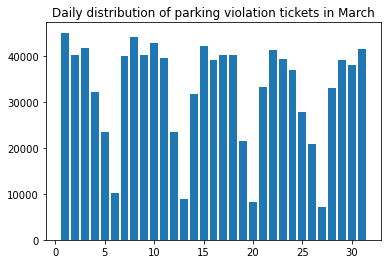

In [47]:
import matplotlib.pyplot as plt

dates_distribtution_modified = dates_distribtution.withColumn("issue_date", F.dayofmonth(F.col("issue_date")))

date = [val.issue_date for val in dates_distribtution_modified.collect()]
dis = [val.COUNT for val in dates_distribtution.collect()]


plt.bar(date,dis)
plt.title("Daily distribution of parking violation tickets in March")

# Outlier Detection

### using the mean and standard deviation we have done a sample outlier detection for daily violation distribution

In [48]:
stats = dates_distribtution.selectExpr("mean(COUNT) as mean", "stddev(COUNT) as stddev").collect()
mean_value = stats[0]["mean"]
stddev_value = stats[0]["stddev"]

# Define a threshold for identifying outliers (e.g., 1/2 standard deviations from the mean)
threshold = 0.5 * stddev_value

# Identify outliers based on the violation count
outliers_df = dates_distribtution.filter(col("COUNT") > mean_value + threshold)
outliers_df_2 = dates_distribtution.filter(col("COUNT") < mean_value - threshold)

# Show the outliers
outliers_df.show(truncate=False)

+----------+-----+
|issue_date|COUNT|
+----------+-----+
|2016-03-01|45090|
|2016-03-02|40291|
|2016-03-03|41751|
|2016-03-07|40062|
|2016-03-08|44166|
|2016-03-09|40289|
|2016-03-10|42878|
|2016-03-11|39502|
|2016-03-15|42118|
|2016-03-16|39134|
|2016-03-17|40131|
|2016-03-18|40269|
|2016-03-22|41292|
|2016-03-23|39262|
|2016-03-29|39179|
|2016-03-31|41558|
+----------+-----+



In [49]:
outliers_df_2.show()

+----------+-----+
|issue_date|COUNT|
+----------+-----+
|2016-03-05|23431|
|2016-03-06|10132|
|2016-03-12|23365|
|2016-03-13| 8800|
|2016-03-19|21560|
|2016-03-20| 8301|
|2016-03-26|20909|
|2016-03-27| 7168|
+----------+-----+

